In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch

In [3]:
# https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge?select=train.csv
raw = pd.read_csv("genomes_genetics.csv")

## Task
Given medical information about children who have genetic disorders predict the current status.

## Data overview

In [4]:
raw.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

### Data selection

In [6]:
raw.drop(["Patient Id",
          "Patient First Name",
          "Family Name",
          "Father's name",
          "Institute Name",
          "Location of Institute",
          "Test 1",
          "Test 2",
          "Test 3",
          "Test 4",
          "Test 5",
          # "Symptom 1",
          # "Symptom 2",
          # "Symptom 3",
          # "Symptom 4",
          # "Symptom 5",
          "Parental consent",
        ], axis=1, inplace=True)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [8]:
raw.rename(columns={
                    "Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"
                    }, inplace=True)

In [9]:
raw.nunique()

,0
Patient_Age,15
Genes_Mother_Side,2
Inherited_Father,2
Maternal_Gene,2
Paternal_Gene,2
Blood_Cell_mcL,22083
Mother_Age,34
Father_Age,45
Status,2
Respiratory_Rate_Breaths_Min,2


In [10]:
_numerical = list(raw.describe().columns)
for c in raw.columns:
    if(c not in _numerical):
        print(raw[c].value_counts())
        print()

Genes_Mother_Side
Yes    13143
No      8940
Name: count, dtype: int64

Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64

Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64

Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64

Status
Alive       11083
Deceased    11000
Name: count, dtype: int64

Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64

Heart_Rates_Min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64

Follow_Up
Low     10040
High     9877
Name: count, dtype: int64

Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64

Birth_Asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64

Autopsy_Birth_Defect
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64

Place_Birth
Institute    10073
Home          9886
Name: count, 

In [11]:
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("No record",np.NaN)
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("Not available",np.NaN)
raw["Autopsy_Birth_Defect"] = raw["Autopsy_Birth_Defect"].replace("None",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("Not applicable",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("-",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("Not applicable",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("-",np.NaN)

### Save cleared data

In [12]:
raw.to_csv('Disorders_dataset_cleared.zip',
            compression={'method':'zip', 'archive_name':'Disorders_dataset_cleared.csv'})

## Data analysis

In [13]:
data = pd.read_csv("Disorders_dataset_cleared.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   20656 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              21777 non-null  object 
 3   Maternal_Gene                 19273 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    16047 non-null  float64
 7   Father_Age                    16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19934 non-null  object 
 10  Heart_Rates_Min               19970 non-null  object 
 11  Follow_Up                     19917 non-null  object 
 12  Gender                        19910 non-null  object 
 13  B

In [14]:
numerical = list(data.describe().columns)
numerical.remove('Symptom 1')
numerical.remove('Symptom 2')
numerical.remove('Symptom 3')
numerical.remove('Symptom 4')
numerical.remove('Symptom 5')
categorical = [c for c in data.columns if c not in numerical]

In [15]:
numerical

['Patient_Age',
 'Blood_Cell_mcL',
 'Mother_Age',
 'Father_Age',
 'Previous_Abortion',
 'White_Blood_Cell']

In [16]:
categorical

['Genes_Mother_Side',
 'Inherited_Father',
 'Maternal_Gene',
 'Paternal_Gene',
 'Status',
 'Respiratory_Rate_Breaths_Min',
 'Heart_Rates_Min',
 'Follow_Up',
 'Gender',
 'Birth_Asphyxia',
 'Autopsy_Birth_Defect',
 'Place_Birth',
 'Folic_Acid',
 'Maternal_Illness',
 'Radiation_Exposure',
 'Substance_Abuse',
 'Assisted_Conception',
 'History_Previous_Pregnancies',
 'Birth_Defects',
 'Blood_Test_Result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic_Disorder',
 'Disorder_Subclass']

### Calculate missing values %

In [17]:
data.isna().mean().sort_values(ascending=False)

,0
Birth_Asphyxia,0.549427
Radiation_Exposure,0.547842
Substance_Abuse,0.546801
Mother_Age,0.273332
Father_Age,0.271068
Autopsy_Birth_Defect,0.198886
Maternal_Gene,0.127247
Symptom 2,0.100620
Gender,0.098401
History_Previous_Pregnancies,0.098356


In [18]:
print(f'{data.isna().sum().sum() / (data.shape[0] * data.shape[1])*100 : .2f}% is missing')

 13.75% is missing


### Numerical data analysis

In [19]:
data[numerical].describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,20656.000000,22083.000000,16047.000000,16097.000000,19921.000000,19935.000000
mean,6.974148,4.898871,34.526454,41.972852,2.003062,7.486224
std,4.319475,0.199663,9.852598,13.035501,1.411919,2.653393
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.763109,26.000000,31.000000,1.000000,5.424703
50%,7.000000,4.899399,35.000000,42.000000,2.000000,7.477132
75%,11.000000,5.033830,43.000000,53.000000,3.000000,9.526152
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000


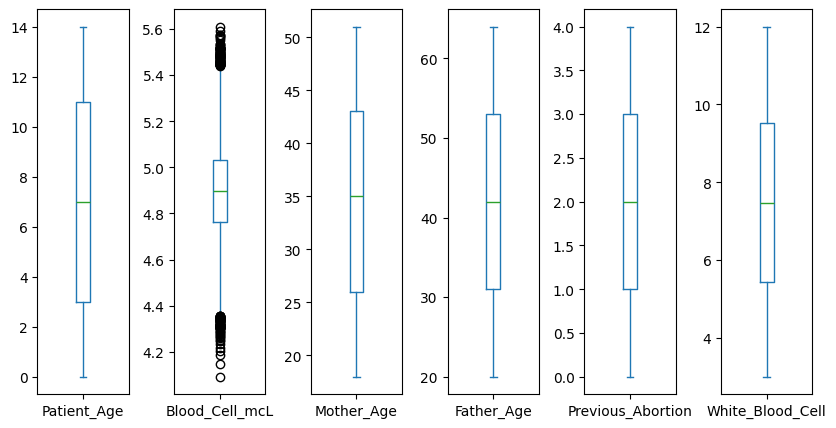

In [20]:
data[numerical].plot(kind='box', subplots=True, sharey=False, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5)

<Axes: >

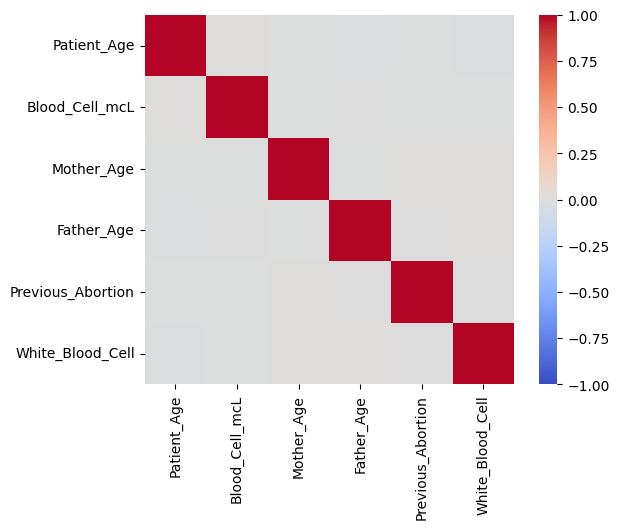

In [21]:
corr_mat = data[numerical].corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

- As we can see there is no correlation between numerical data.

### Check and remove outliers

In [22]:
for c in numerical:
    num = data[c]
    Q1 = num.quantile(0.25)
    Q3 = num.quantile(0.75)
    IQR = Q3 - Q1
    out = num[((num < (Q1 - 1.5 * IQR)) | (num > (Q3 + 1.5 * IQR)))]
    print(f'{c : <20}', len(out))

Patient_Age          0
Blood_Cell_mcL       143
Mother_Age           0
Father_Age           0
Previous_Abortion    0
White_Blood_Cell     0


In [23]:
col = data["Blood_Cell_mcL"]
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
rows_to_drop = col[((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))].index
data.drop(rows_to_drop, inplace=True)

In [24]:
data.shape

(21940, 33)

## Fill N/A data

In [25]:
data.isna().sum()

,0
Patient_Age,1415
Genes_Mother_Side,0
Inherited_Father,305
Maternal_Gene,2795
Paternal_Gene,0
Blood_Cell_mcL,0
Mother_Age,5995
Father_Age,5947
Status,0
Respiratory_Rate_Breaths_Min,2134


In [26]:
for c in data.columns:
    print(f'{c : <30}', data[c].mode()[0])

Patient_Age                    4.0
Genes_Mother_Side              Yes
Inherited_Father               No
Maternal_Gene                  Yes
Paternal_Gene                  No
Blood_Cell_mcL                 4.357634000828609
Mother_Age                     23.0
Father_Age                     20.0
Status                         Alive
Respiratory_Rate_Breaths_Min   Normal (30-60)
Heart_Rates_Min                Normal
Follow_Up                      Low
Gender                         Ambiguous
Birth_Asphyxia                 Yes
Autopsy_Birth_Defect           Not applicable
Place_Birth                    Institute
Folic_Acid                     Yes
Maternal_Illness               No
Radiation_Exposure             No
Substance_Abuse                No
Assisted_Conception            Yes
History_Previous_Pregnancies   Yes
Previous_Abortion              2.0
Birth_Defects                  Singular
White_Blood_Cell               3.0
Blood_Test_Result              slightly abnormal
Symptom 1            

In [27]:
for c in categorical:
    data[c] = data[c].fillna(data[c].mode()[0])

In [28]:
for c in numerical:
    data[c] = data[c].fillna(data[c].mean())

In [29]:
data.dropna(axis=0, inplace=True)
data.isna().sum().sum()

0

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21940 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   21940 non-null  float64
 1   Genes_Mother_Side             21940 non-null  object 
 2   Inherited_Father              21940 non-null  object 
 3   Maternal_Gene                 21940 non-null  object 
 4   Paternal_Gene                 21940 non-null  object 
 5   Blood_Cell_mcL                21940 non-null  float64
 6   Mother_Age                    21940 non-null  float64
 7   Father_Age                    21940 non-null  float64
 8   Status                        21940 non-null  object 
 9   Respiratory_Rate_Breaths_Min  21940 non-null  object 
 10  Heart_Rates_Min               21940 non-null  object 
 11  Follow_Up                     21940 non-null  object 
 12  Gender                        21940 non-null  object 
 13  Birth_

### Vectorization of categorical data

In [31]:
data[categorical].nunique()

,0
Genes_Mother_Side,2
Inherited_Father,2
Maternal_Gene,2
Paternal_Gene,2
Status,2
Respiratory_Rate_Breaths_Min,2
Heart_Rates_Min,2
Follow_Up,2
Gender,3
Birth_Asphyxia,2


In [32]:
binary = [c for c in categorical if len(data[c].unique()) == 2]
nonbinary = [c for c in categorical if len(data[c].unique()) > 2]
nonbinary

['Gender',
 'Autopsy_Birth_Defect',
 'Blood_Test_Result',
 'Genetic_Disorder',
 'Disorder_Subclass']

In [33]:
pd.set_option('future.no_silent_downcasting', True)
for c in binary:
    n = data[c].unique()
    data[c] = data[c].replace({n[0]: 0.0, n[1]: 1.0}).astype(float)

In [34]:
data[nonbinary].head() # omitted in correlation

,Gender,Autopsy_Birth_Defect,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,Ambiguous,Not applicable,slightly abnormal,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,Ambiguous,Not applicable,normal,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,Ambiguous,Not applicable,normal,Multifactorial genetic inheritance disorders,Diabetes
3,Male,No,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Male,Not applicable,slightly abnormal,Multifactorial genetic inheritance disorders,Cancer


In [35]:
data_nonbinary = pd.get_dummies(data[nonbinary])
print(data_nonbinary.columns)

Index(['Gender_Ambiguous', 'Gender_Female', 'Gender_Male',
       'Autopsy_Birth_Defect_No', 'Autopsy_Birth_Defect_Not applicable',
       'Autopsy_Birth_Defect_Yes', 'Blood_Test_Result_abnormal',
       'Blood_Test_Result_inconclusive', 'Blood_Test_Result_normal',
       'Blood_Test_Result_slightly abnormal',
       'Genetic_Disorder_Mitochondrial genetic inheritance disorders',
       'Genetic_Disorder_Multifactorial genetic inheritance disorders',
       'Genetic_Disorder_Single-gene inheritance diseases',
       'Disorder_Subclass_Alzheimer's', 'Disorder_Subclass_Cancer',
       'Disorder_Subclass_Cystic fibrosis', 'Disorder_Subclass_Diabetes',
       'Disorder_Subclass_Hemochromatosis',
       'Disorder_Subclass_Leber's hereditary optic neuropathy',
       'Disorder_Subclass_Leigh syndrome',
       'Disorder_Subclass_Mitochondrial myopathy',
       'Disorder_Subclass_Tay-Sachs'],
      dtype='object')


In [36]:
data_nonbinary.head()

,Gender_Ambiguous,Gender_Female,Gender_Male,Autopsy_Birth_Defect_No,Autopsy_Birth_Defect_Not applicable,Autopsy_Birth_Defect_Yes,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal,...,Genetic_Disorder_Single-gene inheritance diseases,Disorder_Subclass_Alzheimer's,Disorder_Subclass_Cancer,Disorder_Subclass_Cystic fibrosis,Disorder_Subclass_Diabetes,Disorder_Subclass_Hemochromatosis,Disorder_Subclass_Leber's hereditary optic neuropathy,Disorder_Subclass_Leigh syndrome,Disorder_Subclass_Mitochondrial myopathy,Disorder_Subclass_Tay-Sachs
0,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


### Normalize quantitative features

In [37]:
data_num = data[numerical]
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000
mean,6.971303,4.898527,34.526748,41.974989,2.003233,7.484069
std,4.177508,0.194487,8.400404,11.132233,1.340716,2.521212
min,0.000000,4.357634,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.764229,29.000000,35.000000,1.000000,5.653738
50%,6.971303,4.899253,34.526748,41.974989,2.000000,7.484069
75%,10.000000,5.032440,40.000000,49.000000,3.000000,9.278767
max,14.000000,5.439651,51.000000,64.000000,4.000000,12.000000


In [38]:
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,2.194000e+04,2.194000e+04,2.194000e+04,2.194000e+04,2.194000e+04,2.194000e+04
mean,1.845986e-17,1.844367e-15,-1.651672e-16,1.245231e-16,-1.188556e-16,-3.426409e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.668771e+00,-2.781128e+00,-1.967375e+00,-1.973996e+00,-1.494151e+00,-1.778537e+00
25%,-9.506393e-01,-6.905231e-01,-6.579146e-01,-6.265579e-01,-7.482815e-01,-7.259726e-01
50%,0.000000e+00,3.730721e-03,0.000000e+00,0.000000e+00,-2.411502e-03,-3.522823e-16
75%,7.250008e-01,6.885417e-01,6.515462e-01,6.310514e-01,7.434585e-01,7.118393e-01
max,1.682509e+00,2.782312e+00,1.961007e+00,1.978490e+00,1.489328e+00,1.791175e+00


### Merge numerical, nonbinary, binary

In [39]:
data = pd.concat((data_num, data[binary], data_nonbinary), axis=1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21940 entries, 0 to 22082
Data columns (total 50 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Patient_Age                                                    21940 non-null  float64
 1   Blood_Cell_mcL                                                 21940 non-null  float64
 2   Mother_Age                                                     21940 non-null  float64
 3   Father_Age                                                     21940 non-null  float64
 4   Previous_Abortion                                              21940 non-null  float64
 5   White_Blood_Cell                                               21940 non-null  float64
 6   Genes_Mother_Side                                              21940 non-null  float64
 7   Inherited_Father                                               

## Split into train and test

In [41]:
X = data.drop("Status", axis=1) # Drop target
X = X.to_numpy()

In [42]:
Y = data["Status"]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(15358, 49) (15358, 2) (6582, 49) (6582, 2)


## Test learning algorithms

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def Report(Y, Pred):
  Y_     = np.argmax(Y,    axis=1)
  Y_pred = np.argmax(Pred, axis=1)
  print(classification_report(Y_, Y_pred))
  print('Confusion matrix:')
  print(confusion_matrix(Y_, Y_pred))

def Accuracy(Y, Pred):
  Y_     = np.argmax(Y,    axis=1)
  Y_pred = np.argmax(Pred, axis=1)
  return np.mean(Y_ == Y_pred)

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors = 100, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)


Report(Y_test, Y_test_predict)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3289
           1       1.00      0.59      0.75      3293

    accuracy                           0.80      6582
   macro avg       0.85      0.80      0.79      6582
weighted avg       0.85      0.80      0.79      6582

Confusion matrix:
[[3284    5]
 [1335 1958]]


In [47]:
n_neighbors = np.logspace(0.5, 2.5, num=7, dtype=int)
acc = []

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, Y_train)
  Y_test_predict = knn.predict(X_test)
  acc.append(Accuracy(Y_test, Y_test_predict))

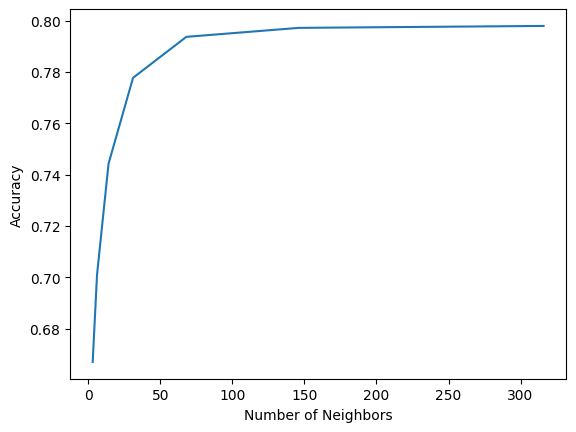

In [48]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.plot(n_neighbors, acc)
plt.show()

- n_neighbours=150 is optimal hyperparameter value

### Random Forest
Is used for classification problems with categorical target variables.

In [49]:
from sklearn import ensemble

In [50]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train, Y_train)
Report(Y_test, rf.predict(X_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3289
           1       1.00      0.60      0.75      3293

    accuracy                           0.80      6582
   macro avg       0.86      0.80      0.79      6582
weighted avg       0.86      0.80      0.79      6582

Confusion matrix:
[[3289    0]
 [1329 1964]]


In [51]:
n_estimators = np.logspace(0.5, 2.5, num=7, dtype=int)
acc = []

for i in n_estimators:
  rf = ensemble.RandomForestClassifier(n_estimators = i, n_jobs=-1)
  rf.fit(X_train, Y_train)
  acc.append(Accuracy(Y_test, rf.predict(X_test)))

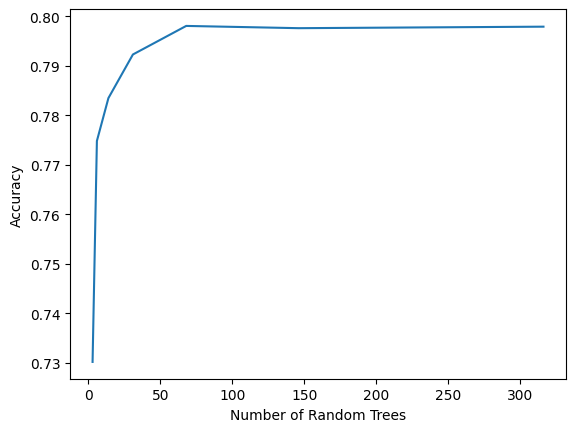

In [52]:
plt.xlabel('Number of Random Trees')
plt.ylabel('Accuracy')
plt.plot(n_estimators, acc)
plt.show()

If Random Forest doesn't match with any label, numpy.argmax returns 0. This explains the bias towards the first class.

- Random Forest with optimal hyper parameter value n_estimators=100 shows comparable quality with KNN.

# Neural Networks with PyTorch

### Prepare data

In [53]:
type(X_train)

numpy.ndarray

In [54]:
X_train = torch.from_numpy(np.float32(X_train))
Y_train = torch.from_numpy(np.float32(Y_train))
X_test = torch.from_numpy(np.float32(X_test))
Y_test = torch.from_numpy(np.float32(Y_test))

n, in_dim = X_train.shape
out_dim = Y_train.shape[1]
print(n, in_dim, out_dim)

15358 49 2


## Logistic Regression

In [55]:
from torch.nn import (Module, Sequential, Linear, ReLU, Softmax, CrossEntropyLoss)

class LogReg(Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg, self).__init__()
        self.linear = Linear(input_dim, output_dim)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


model = LogReg(in_dim, out_dim)

print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()

# model.train()
Loss = []
Acc = []

for epoch in range(10):
    for (x, y) in zip(X_train, Y_train):
        optimizer.zero_grad()
        y_ = model(x)
        loss = criterion(y_, y)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())

    correct = 0
    for (x, y) in zip(X_test, Y_test):
        correct += (torch.argmax(y) == torch.argmax(model(x)))
    Acc.append(correct/len(X_test))
    print(f'{epoch=} Loss={Loss[-1]} Accuracy={Acc[-1]}')


LogReg(
  (linear): Linear(in_features=49, out_features=2, bias=True)
)
epoch=0 Loss=0.6681089997291565 Accuracy=0.7910969257354736
epoch=1 Loss=0.5999910235404968 Accuracy=0.7979337573051453
epoch=2 Loss=0.5523365139961243 Accuracy=0.7979337573051453
epoch=3 Loss=0.5189816355705261 Accuracy=0.7979337573051453
epoch=4 Loss=0.49494895339012146 Accuracy=0.7979337573051453
epoch=5 Loss=0.4769899547100067 Accuracy=0.7979337573051453
epoch=6 Loss=0.4631105661392212 Accuracy=0.7979337573051453
epoch=7 Loss=0.45207202434539795 Accuracy=0.7979337573051453
epoch=8 Loss=0.4430795907974243 Accuracy=0.7979337573051453
epoch=9 Loss=0.4356064796447754 Accuracy=0.7979337573051453


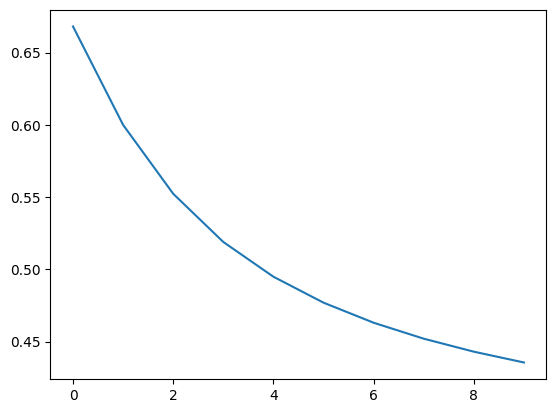

In [56]:
plt.plot(Loss)

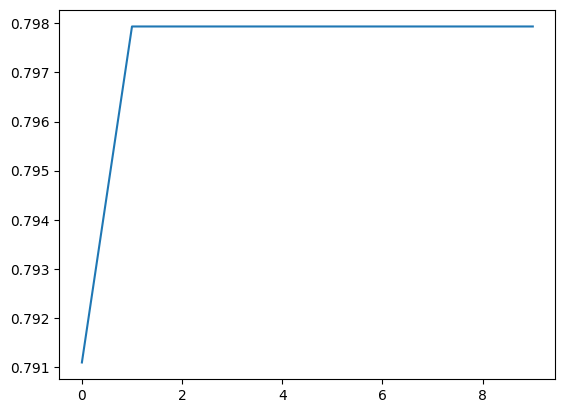

In [57]:
plt.plot(Acc)

We see decrease in loss with no improvement in validation. We should use dropout to reduce overfitting of the model.

In [58]:
Y = []
Pred = []
for (x, y) in zip(X_test, Y_test):
    Y.append(torch.argmax(y))
    Pred.append(torch.argmax(model(x)))

confusion_matrix(Y, Pred)

array([[3289,    0],
       [1330, 1963]])

### FFN

In [59]:
from torch.nn import (Module, Sequential, Linear, ReLU, Sigmoid, Softmax, CrossEntropyLoss)

class FFN(Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(FFN, self).__init__()
        self.ffn = Sequential(
            Linear(input_dim, hidden_dim),
            ReLU(),
            Linear(hidden_dim, output_dim),
            Softmax(dim=0),
        )

    def forward(self, x):
        return self.ffn(x)

def train(mid_dim):
    print(f'{mid_dim=}')
    model = FFN(in_dim, out_dim, mid_dim)

    criterion = CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    Loss = []
    Acc = []

    for epoch in range(5):
        for (x, y) in zip(X_train, Y_train):
            optimizer.zero_grad()
            y_ = model(x)
            loss = criterion(y_, y)
            loss.backward()
            optimizer.step()
        Loss.append(loss.item())

        correct = 0
        for (x, y) in zip(X_test, Y_test):
            correct += (torch.argmax(y) == torch.argmax(model(x)))
        Acc.append(correct/len(X_test))
        print(f'{epoch=} Loss={Loss[-1]} Accuracy={Acc[-1]}')

    return max(Acc)

In [60]:
train(50)

mid_dim=50
epoch=0 Loss=0.33722397685050964 Accuracy=0.7979337573051453
epoch=1 Loss=0.32350650429725647 Accuracy=0.7979337573051453
epoch=2 Loss=0.32157430052757263 Accuracy=0.7979337573051453
epoch=3 Loss=0.3201866149902344 Accuracy=0.7979337573051453
epoch=4 Loss=0.3193177282810211 Accuracy=0.7977818250656128


tensor(0.7979)

## Results

In both neural network models we see overfitting. Use of deep neural networks with droupout should help to increase accuracy.